In [14]:
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.set_context("talk", font_scale=1)
sns.set_style("ticks")
sns.set_style("darkgrid")

%matplotlib inline

In [55]:
t1 = np.linspace(0, 50,10, endpoint=False)
t2 = t1+5
t = zip(t1,t2)

numSamples = 1000
tInterval = np.linspace(0,5,numSamples,endpoint=False)
startsEnds = np.array(list(t))
lenIntervals = np.shape(tInterval)[0]
numIntervals = np.shape(startsEnds)[0]
tTotalLength = np.linspace(0,np.max(t2),lenIntervals*numIntervals,endpoint=False)



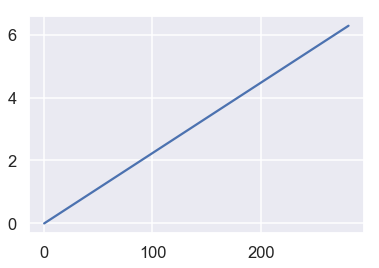

In [161]:
plt.plot(tNew)

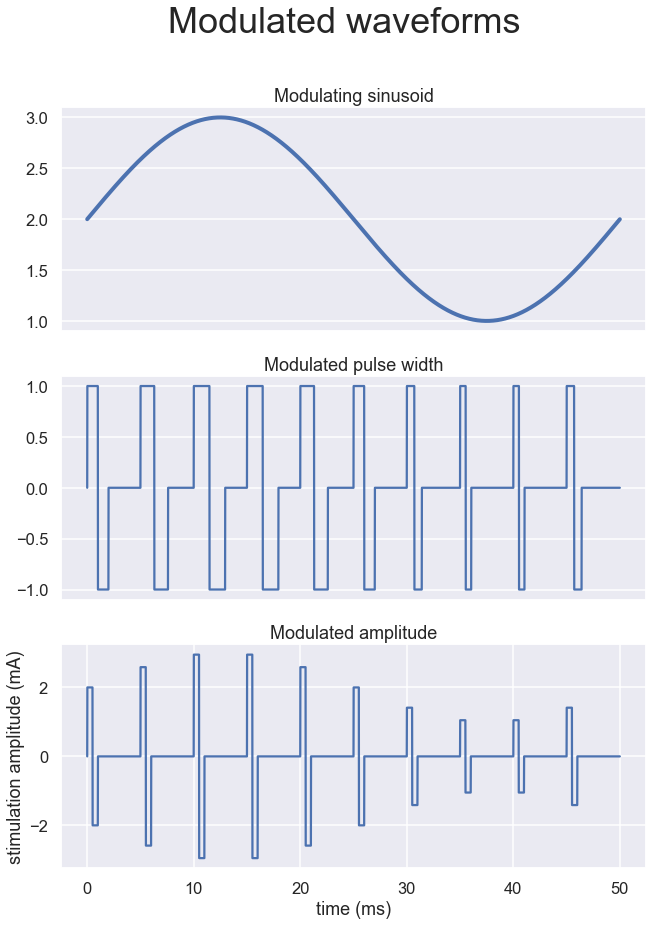

In [165]:
sig = np.sin(2 * np.pi * tTotalLength / 50)+2
pwmPW = np.zeros((lenIntervals*numIntervals,))
pwmAMP = np.zeros((lenIntervals*numIntervals,))

fixedpwmAMP = 200

count = 0
for i in t1:
    startLocation = np.where(tTotalLength==i)[0][0]
    pw = int(round(200*sig[startLocation]))
    tNew = np.linspace(0,2*np.pi,pw)
    pwmPW[startLocation:startLocation+pw-1] = signal.square(tNew)[0:-1]
    pwmAMP[startLocation:startLocation+fixedpwmAMP] = sig[startLocation]*signal.square(2 * np.pi * tInterval[0:fixedpwmAMP] )

pwmPW[0] = 0
pwmAMP[0] = 0
####################################

f, axarr = plt.subplots(3,1)
f.set_size_inches(10.5, 14)
f.suptitle("Modulated waveforms",fontsize=36)


axarr[0].set_title('Modulating sinusoid')
axarr[0].plot(tTotalLength, sig,lw=4)
axarr[0].xaxis.set_visible(False)

axarr[1].plot(tTotalLength, pwmPW)
axarr[1].set_xlabel('time (ms)')
axarr[1].set_title('Modulated pulse width')
axarr[1].xaxis.set_visible(False)


axarr[2].plot(tTotalLength, pwmAMP)
axarr[2].set_ylabel('stimulation amplitude (mA)')
axarr[2].set_xlabel('time (ms)')
axarr[2].set_title('Modulated amplitude')

plt.savefig('modulatedWaveform.png', dpi=600)